In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

In [7]:
df = pd.read_csv("C:/Users/jllce/Downloads/adult.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
describe(df)

NameError: name 'describe' is not defined

In [11]:
#procurando os valores nulos
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
#apesar de nao ter nulos, quando eu olho com mais atenção, eu vejo vários "?"
df.head(10).T #(matriz transposta - trocando linhas por colunas)

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


In [13]:
#!pip install Sweetviz

In [14]:
import sweetviz as sv

In [15]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
#Da análise desse big relatório, consigo ver a presença do "?" em três variáveis categóricas
#Workclass, Occupation e Country
#A professora pegou onde tinha o ? e trocou por nan

df["workclass"] = df["workclass"].replace("?",np.nan)
df["occupation"] = df["occupation"].replace("?",np.nan)
df["native-country"] = df["native-country"].replace("?",np.nan)

In [17]:
df.isnull().sum()
#com isso, tenho algumas opções, como tentar estimar esses valores ou
#trabalhar com as variáveis e excluir as observações com valor nulo ou
#não trabalhar com essas variáveis

#A opção escolhida foi a 3ª

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
df = df.drop(labels=['workclass', 'occupation', "native-country"], axis=1)

In [19]:
#agora avaliando melhor as variáveis quantitativas:
df.describe().T #o describe vai mostrar apenas as 6 features que são quantitativas

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [20]:
#Aparentemente tá tudo certo com as variáveis quantitativas. É claro que temos que olhar os outliers depois
#Com relação ao income (target), o relatório do sweetviz mostra que 76% das observações sao para abaixo de 50k e 26%
#acima de 50k.
#mas poderia usar essa formulinha:
(df.income.value_counts()/df.shape[0])*100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

In [21]:
#Então, posso continuar meu processo trabalhando com a base desse jeito, tendo apenas 24% >50k e 76% <=50k.
#Porém, há como balancearmos essa base. A professora escolheu continuar com a base desbalanceada.
#Agora, transformaremos a target em variável numérica.
df["Renda"] = df["income"].map({"<=50K":0, ">50K":1}).astype(int)
df
#mas pelo que vi, a professora vai cagar pra essa "renda" e vai continuar usando a "income"

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,Renda
0,25,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,<=50K,0
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,<=50K,0
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,>50K,1
3,44,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,>50K,1
4,18,103497,Some-college,10,Never-married,Own-child,White,Female,0,0,30,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,<=50K,0
48838,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,>50K,1
48839,58,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,<=50K,0
48840,22,201490,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,<=50K,0


<AxesSubplot:xlabel='age', ylabel='Count'>

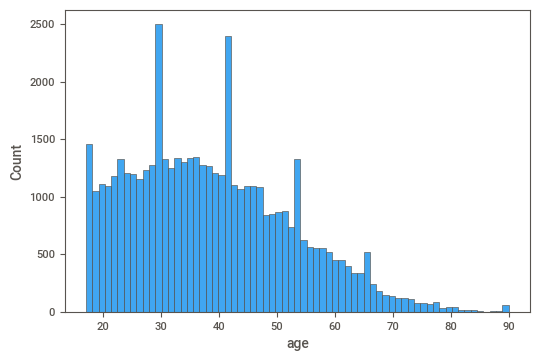

In [22]:
#verificando as preditoras agora.
#Age
sb.histplot(data=df, x="age")

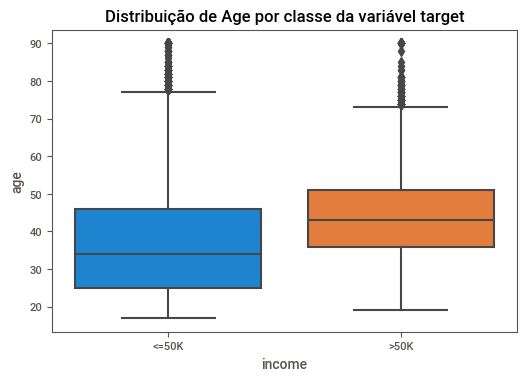

In [23]:
#verificando a relação, em um boxplot, entre age e income
sb.boxplot(x="income", y="age", data=df)
plt.title("Distribuição de Age por classe da variável target")
plt.show()

#já conseguimos ver que quanto maior a idade, maior a probabilidade de ter uma renda maior que 50K

In [24]:
#Ela disse que o naive bayes pode ser usado com variáveis de vários tipos, quantitativa ou categórica. Mas ela vai 
#transformar pra categorica a variavel age
age_cat = []
for dados in df["age"]:
    if dados <= 30:
        age_cat.append("0")
    elif dados <= 45:
        age_cat.append("1")
    else:
        age_cat.append("2")
        
df["age_cat"] = age_cat
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0


<AxesSubplot:xlabel='income'>

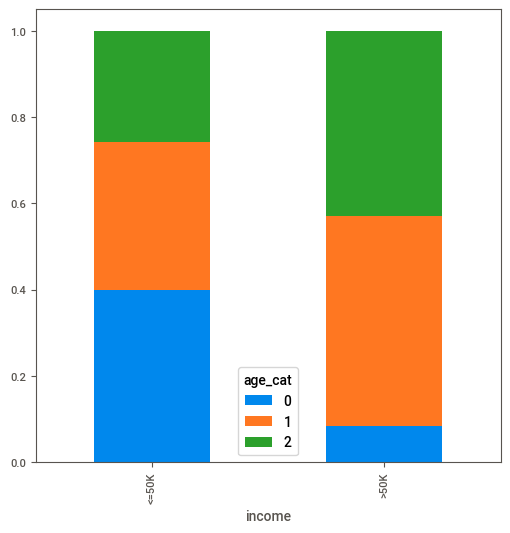

In [25]:
#comparação entre a age_cat e a target
Age_cat = pd.crosstab(df["income"], df["age_cat"])
Age_cat.div(Age_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

<AxesSubplot:xlabel='age_cat'>

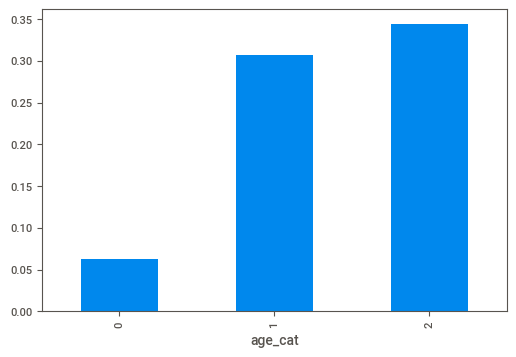

In [26]:
#partindo para a comparação do age_cat com aquela variável renda que foi criada
df.groupby("age_cat").Renda.mean().plot(kind="bar")

#ou seja, quanto maior a idade, maior a renda média

<AxesSubplot:xlabel='income'>

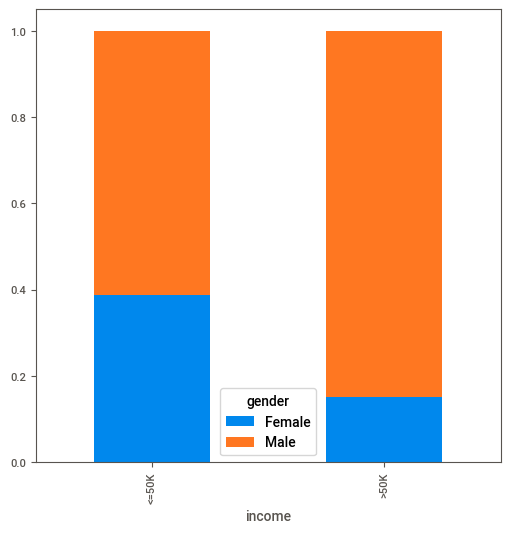

In [27]:
#variavel sexo
Gender = pd.crosstab(df["income"], df["gender"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
#é possível perceber que o sexo masculino tem uma presença maior nas maiores rendas

In [28]:
#agora ela vai criar dummies pra variavel sexo
df["Male"] = df["gender"].map({"Male":1, "Female":0}).astype(int)

<AxesSubplot:xlabel='Male'>

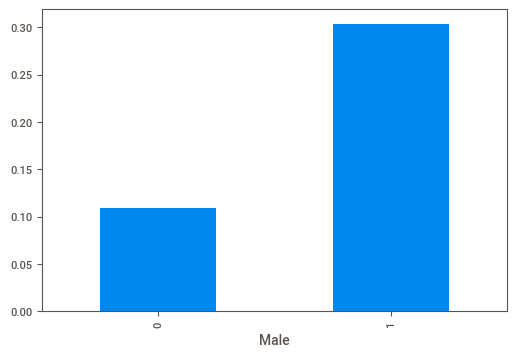

In [29]:
#partindo para a comparação do sexo com aquela variável renda que foi criada
df.groupby("Male").Renda.mean().plot(kind="bar")
#então se percebe que a renda média é maior para o masculino

<AxesSubplot:xlabel='income'>

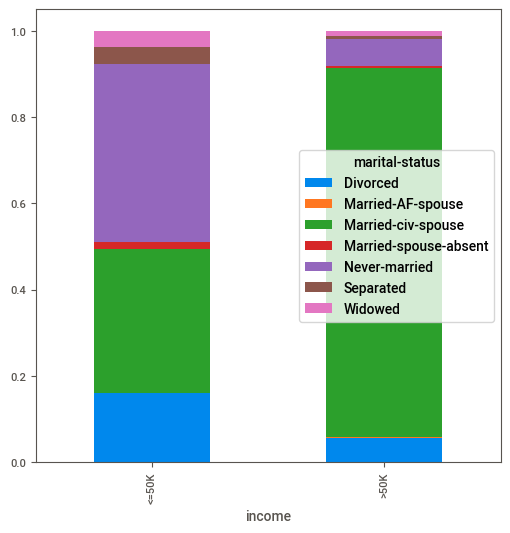

In [30]:
#partindo para estado civil
MaritalStatus = pd.crosstab(df["income"], df["marital-status"])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
#É possível ver que muitas categorias atrapalham e só algumas são principais: casado no civil, solteiro e divorciado.
#Logo, criaremos uma categoria de casado e não casado.

In [31]:
#Transformando a variável estado civil em casado e nao casado
df["Married"] = df["marital-status"].map({"Divorced":0, "Married-spouse-absent":0, "Widowed":0, "Separated":0,
                                         "Never-married":0, "Married-AF-spouse":1, "Married-civ-spouse":1})

<AxesSubplot:xlabel='income'>

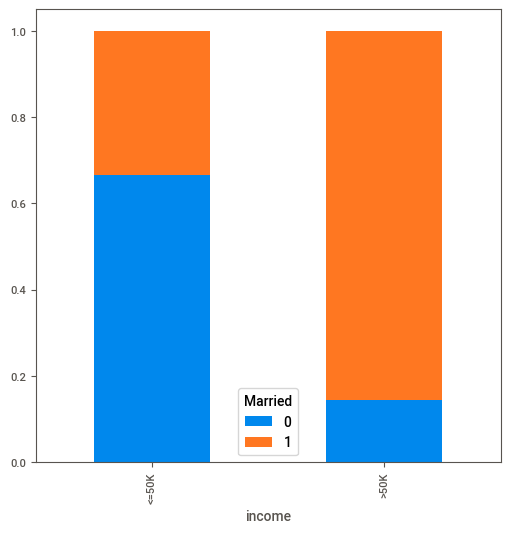

In [32]:
MaritalStatus = pd.crosstab(df["income"], df["Married"])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

<AxesSubplot:xlabel='Married'>

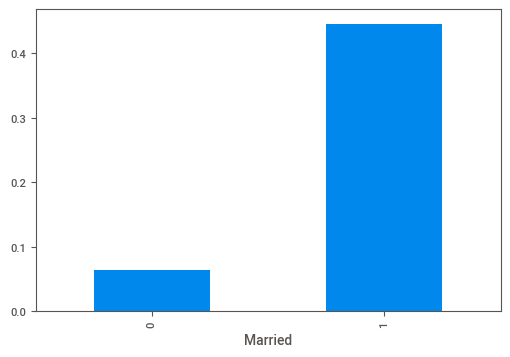

In [33]:
df.groupby("Married").Renda.mean().plot(kind="bar")
#os casados possuem renda média muito maior

<AxesSubplot:xlabel='income'>

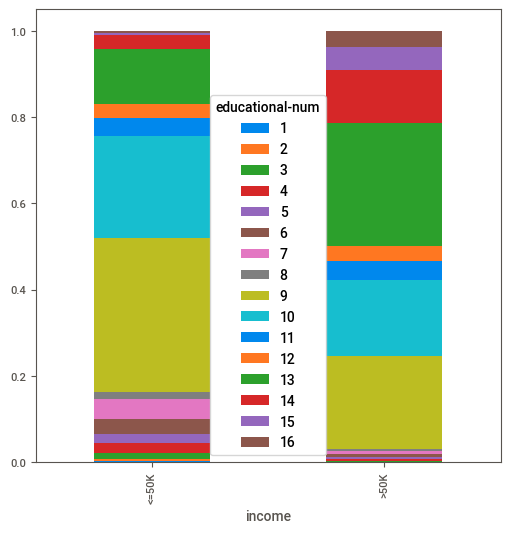

In [34]:
#variável educacional
Educational = pd.crosstab(df["income"], df["educational-num"])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
#Neste fica complicado ter insights para categorizar melhor essas variáveis. Logo, vamos usar outro gráfico

<AxesSubplot:xlabel='educational-num'>

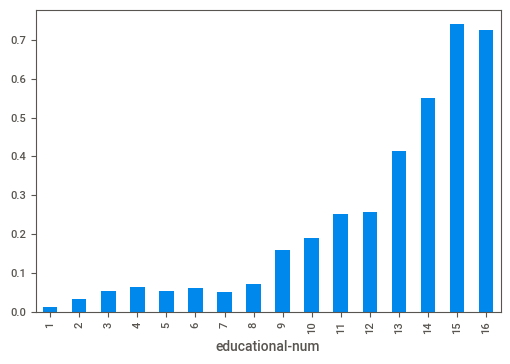

In [35]:
df.groupby("educational-num").Renda.mean().plot(kind="bar")
#Quanto maior o nível educacional atingido, maior a renda média

In [36]:
educa_cat = []
for dados in df["educational-num"]:
    if dados <= 8:
        educa_cat.append("0")
    elif dados == 9:
        educa_cat.append("1")
    elif dados <= 12:
        educa_cat.append("2")
    else:
        educa_cat.append("3")
        
df["educa_cat"] = educa_cat
df.head().T

#acho que o 9 ficou sozinho pq de acordo com o relatorio sweetviz ele é o que tem maior frequência. Ou então pq a educação
#nos EUA é separado assim - educação básica, ensino médio, superior e stricto sensu.

,0,1,2,3,4
age,25,38,28,44,18
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0


<AxesSubplot:xlabel='income'>

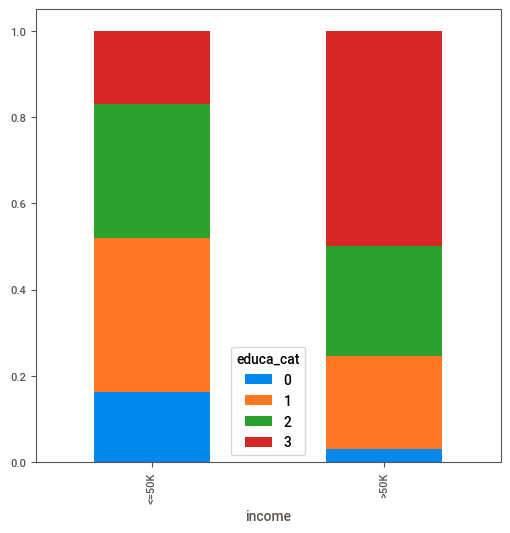

In [37]:
Educational = pd.crosstab(df["income"], df["educa_cat"])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

<AxesSubplot:xlabel='educa_cat'>

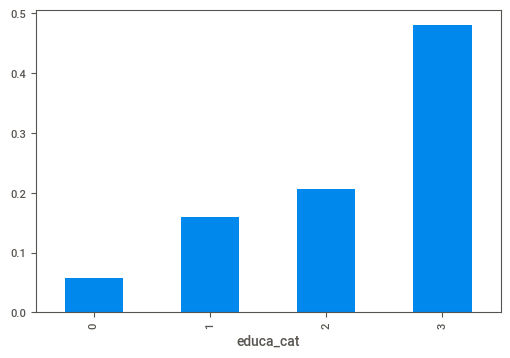

In [38]:
df.groupby("educa_cat").Renda.mean().plot(kind="bar")

<AxesSubplot:xlabel='income'>

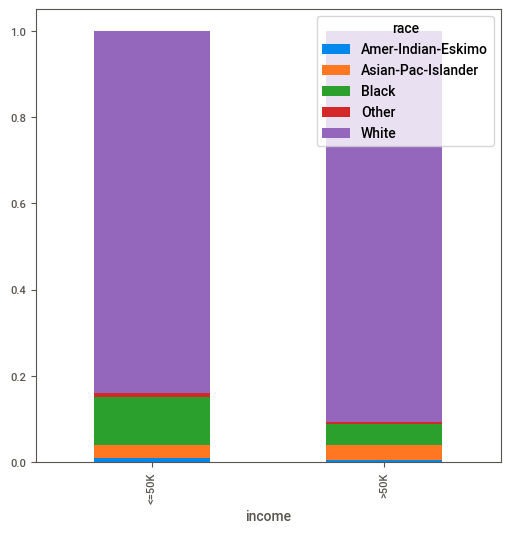

In [39]:
#Agora a variável race
Race = pd.crosstab(df["income"], df["race"])
Race.div(Race.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

In [40]:
df["race_white"] = df["race"].map({"Black":0, "Other":0, "Asian-Pac-Islander":0, "Amer-Indian-Eskimo":0,
                                         "White":1})

<AxesSubplot:xlabel='income'>

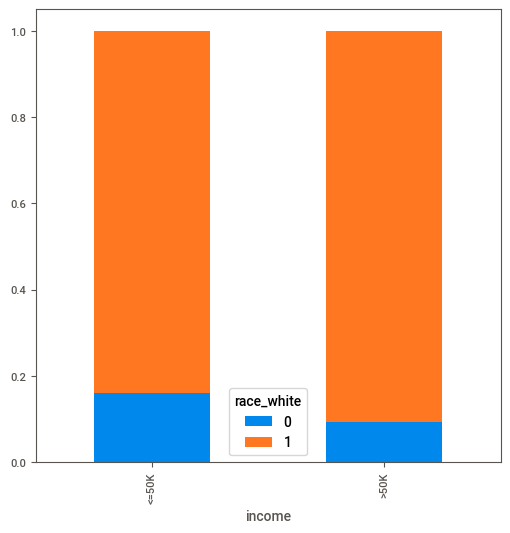

In [41]:
Race_white = pd.crosstab(df["income"], df["race_white"])
Race_white.div(Race_white.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

<AxesSubplot:xlabel='race_white'>

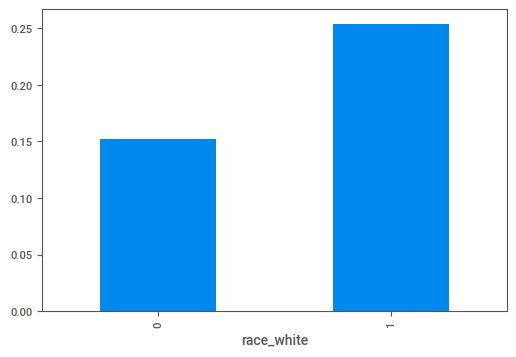

In [42]:
df.groupby("race_white").Renda.mean().plot(kind="bar")

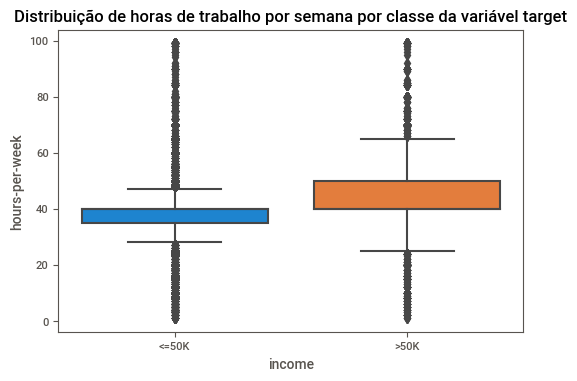

In [43]:
#horas trabalhadas por semana
sb.boxplot(x="income", y="hours-per-week", data=df)
plt.title("Distribuição de horas de trabalho por semana por classe da variável target")
plt.show()

In [44]:
#vamos transformar a variavel de horas pra 3 categorias, <40, =40, e >40. O 40 tá sozinho pq pelo relatorio ele é disparado
#a observação de maior frequencia

horasweek = []
for dados in df["hours-per-week"]:
    if dados < 40:
        horasweek.append("0")
    elif dados == 40:
        horasweek.append("1")
    else:
        horasweek.append("2")
        
df["horasweek"] = horasweek
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0


<AxesSubplot:xlabel='horasweek'>

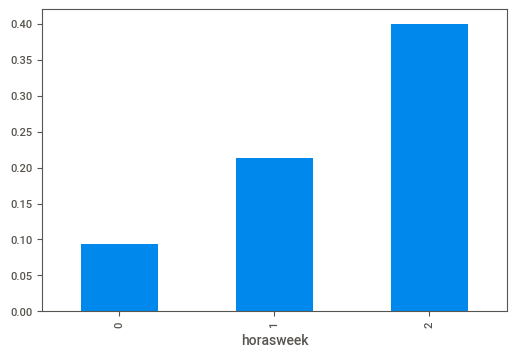

In [45]:
df.groupby("horasweek").Renda.mean().plot(kind="bar")
#logo, quanto mais se trabalha, maior é a renda média

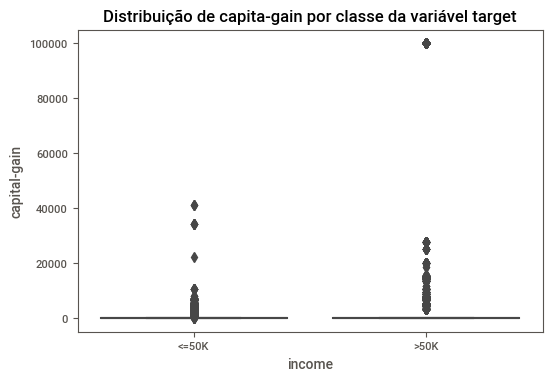

In [46]:
#variável de capital_gain
sb.boxplot(x="income", y="capital-gain", data=df)
plt.title("Distribuição de capita-gain por classe da variável target")
plt.show()

In [47]:
#pelo que foi visto a maioria é 0. O relatorio fala em 92% de capital-gain nulo. Logo, transformaremos pra 0e1
capitalgain = []
for dados in df["capital-gain"]:
    if dados == 0:
        capitalgain.append("0")
    else:
        capitalgain.append("1")
        
df["capitalgain"] = capitalgain
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0


<AxesSubplot:xlabel='capitalgain'>

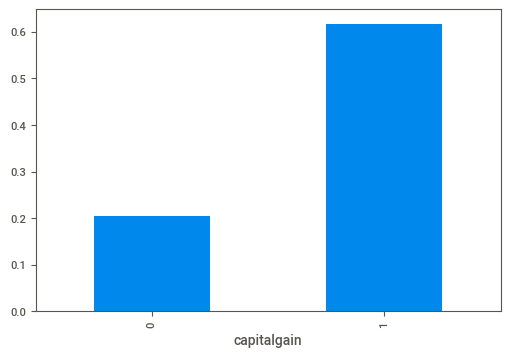

In [48]:
df.groupby("capitalgain").Renda.mean().plot(kind="bar")
#pros poucos que tiveram ganho de capital, a renda média foi maior

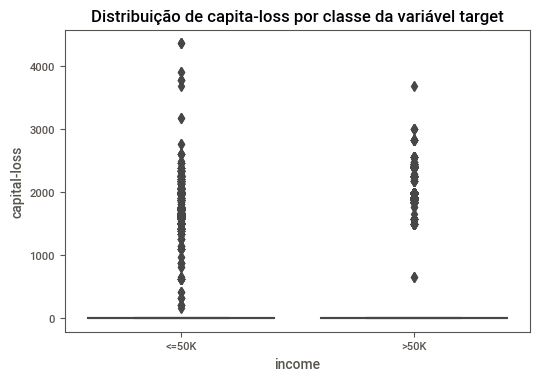

In [49]:
#variável de capital_loss
sb.boxplot(x="income", y="capital-loss", data=df)
plt.title("Distribuição de capita-loss por classe da variável target")
plt.show()
#capital-loss é ainda pior, 95% nulo

In [50]:
capitalloss = []
for dados in df["capital-loss"]:
    if dados == 0:
        capitalloss.append("0")
    else:
        capitalloss.append("1")
        
df["capitalloss"] = capitalloss
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female
capital-gain,0,0,0,7688,0
capital-loss,0,0,0,0,0


<AxesSubplot:xlabel='capitalloss'>

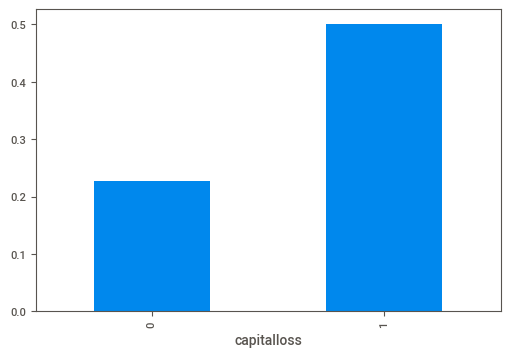

In [51]:
df.groupby("capitalloss").Renda.mean().plot(kind="bar")
#pros poucos que tiveram perda de capital, a renda média foi maior

In [52]:
#Será então que os que tiveram ganho de capital não são os mesmos que tiveram perda?
check = df.groupby(["capitalgain", "capitalloss"]).size().unstack(1)
check.head(20)
#não foram as mesmas, se não o 1,1 nao estariam NaN. Mas como quem ganha ou perde tem renda média maior, seria bom
#juntar no 0 os 0,0 e no 1 os 0,1 e 1,0. Até pq a quantidade de 1,0 e 0,1 são muito pequenas. Vale a pena juntar

capitalloss,0,1
capitalgain,,
0,42525.0,2282.0
1,4035.0,NaN


In [53]:
#Portanto, criação da variável gainloss
df.loc[((df.capitalgain == "0") & (df.capitalloss == "0")), "gainloss"]="0"
df.loc[((df.capitalgain == "1") & (df.capitalloss == "0")), "gainloss"]="1"
df.loc[((df.capitalgain == "0") & (df.capitalloss == "1")), "gainloss"]="1"

(df.gainloss.value_counts() / df.shape[0]) * 100

0    87.066459
1    12.933541
Name: gainloss, dtype: float64

<AxesSubplot:xlabel='gainloss'>

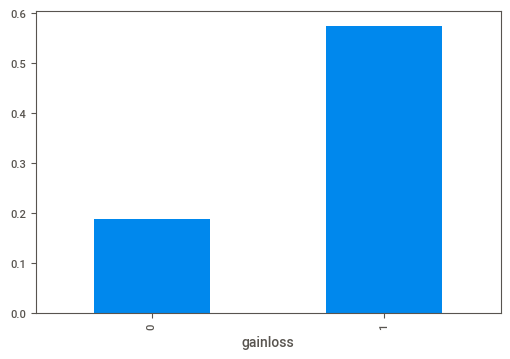

In [54]:
df.groupby("gainloss").Renda.mean().plot(kind="bar")

In [56]:
#agora finalmente temos:
#preditoras: age_cat, Male, Married, race_white, educa_cat, horasweek e gainloss
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   fnlwgt           48842 non-null  int64 
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  income           48842 non-null  object
 12  Renda            48842 non-null  int32 
 13  age_cat          48842 non-null  object
 14  Male             48842 non-null  int32 
 15  Married          48842 non-null  int64 
 16  educa_cat        48842 non-null  object
 17  race_white       48842 non-null

In [60]:
#o axis=1 significa que quero descartar a coluna inteira
#quando uso o inplace = true, significa que já estou substituindo o df original por esse novo df,
#então não preciso escrever df = df.drop

df.drop(labels=["age", 'fnlwgt', 'education', "educational-num", "marital-status", "relationship", "race", "gender",
               "capital-gain", "capital-loss", "hours-per-week", "capitalgain", "capitalloss",
                "Renda"], axis=1, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   income      48842 non-null  object
 1   age_cat     48842 non-null  object
 2   Male        48842 non-null  int32 
 3   Married     48842 non-null  int64 
 4   educa_cat   48842 non-null  object
 5   race_white  48842 non-null  int64 
 6   horasweek   48842 non-null  object
 7   gainloss    48842 non-null  object
dtypes: int32(1), int64(2), object(5)
memory usage: 2.8+ MB


In [68]:
df

,income,age_cat,Male,Married,educa_cat,race_white,horasweek,gainloss
0,<=50K,0,1,0,0,0,1,0
1,<=50K,1,1,1,1,1,2,0
2,>50K,0,1,1,2,1,1,0
3,>50K,1,1,1,2,0,1,1
4,<=50K,0,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...
48837,<=50K,0,0,1,2,1,0,0
48838,>50K,1,1,1,1,1,1,0
48839,<=50K,2,0,0,1,1,1,0
48840,<=50K,0,1,0,1,1,0,0


In [71]:
#agora indo pro naive bayes.
#separando em conjuntos de preditoras e target
X = df.iloc[:,1:8].values
y = df.iloc[:,0].values
X.shape, y.shape

((48842, 7), (48842,))

In [72]:
print(X)

[['0' 1 0 ... 0 '1' '0']
 ['1' 1 1 ... 1 '2' '0']
 ['0' 1 1 ... 1 '1' '0']
 ...
 ['2' 0 0 ... 1 '1' '0']
 ['0' 1 0 ... 1 '0' '0']
 ['2' 0 1 ... 1 '1' '1']]


In [73]:
print(y)

['<=50K' '<=50K' '>50K' ... '<=50K' '<=50K' '>50K']


In [75]:
#Agora o próximo passo é separar a base de dados de treino (70%) e teste (30%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state = 17) 

In [76]:
#O CategoricalNB é uma das opções do meu naive_bayes para quando as variáveis são categóricas. Se fosse variáveis do 
#tipo contínua, teria outros modelos do naive_bayes, como o gaussiano.
from sklearn.naive_bayes import CategoricalNB

nbCat = CategoricalNB()

In [77]:
# Já vou aplicar esse modelo nos conjuntos de treino da variavel dependente e independente, treinando nosso modelo
# com esse conjunto.
nbCat.fit(X_train, y_train)

CategoricalNB()

In [78]:
#agora eu aplico esse algoritmo treinado em cima do conjunto de X test, de forma que ele me estime a variavel target

y_pred = nbCat.predict(X_test)

In [82]:
#Agora vamos pra matriz de confusao pra confrontar o y_pred com o y_test e verificar quantos eu acertei com meu modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

cm_nbCat = confusion_matrix(y_test, y_pred)

print("ConfusionMatrix:"), cm_nbCat

ConfusionMatrix:


(None,
 array([[9788, 1347],
        [1259, 2259]], dtype=int64))

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#aqui deu pra perceber que, pra base de observações com income >50K, a precisão é baixa. 
#Isso deve me fazer refletir sobre as variáveis escolhidas e como foram tratadas, bem como
#Tentar trabalhar com o balanceamento entre o conjutno de >50K e <=50K.
#Pode ser também do modelo, logo, tem-se que buscar usar outros modelos pra ver se preveem melhor

              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88     11135
        >50K       0.63      0.64      0.63      3518

    accuracy                           0.82     14653
   macro avg       0.76      0.76      0.76     14653
weighted avg       0.82      0.82      0.82     14653



In [90]:
print("Accuracy:", (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 82.21524602470484


In [92]:
#e aí podemos brincar. Tipo, se eu pegar um indivíduo que tenha age_cat=2, seja masculino, seja casado, etc., qual 
#será a classificação de income dele?

[["age_cat", "Male", "Married", "educa_cat", "race_white", "horasweek", "gainloss"]]

nbCat.predict([[2,1,1,2,1,1,1]])
#logo, meu modelo diz que ele ganharia mais que 50K

array(['>50K'], dtype='<U5')